<a href="https://colab.research.google.com/github/BobChrismansyah/Citra-Data/blob/main/MID_H071201087.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as sublots
import cv2
import skimage.io
from PIL import Image, ImageEnhance, ImageDraw, ImageChops
from skimage.io import imread
from google.colab.patches import cv2_imshow
import imageio

#Nomor 1
####Ubah ukuran citra banana.jpg menjadi setengah dari ukuran semula (300x450).

In [157]:
img_ori = cv2.imread('banana.jpg')
print("Ukuran Asli : ", img_ori.shape)


Ukuran Asli :  (600, 900, 3)


In [158]:
width = 300
height = 450
dim = (width, height)

In [159]:
img_new = cv2.resize(img_ori, dim, interpolation = cv2.INTER_AREA)
print('ubah ukuran menjadi : ', img_new.shape)

ubah ukuran menjadi :  (450, 300, 3)


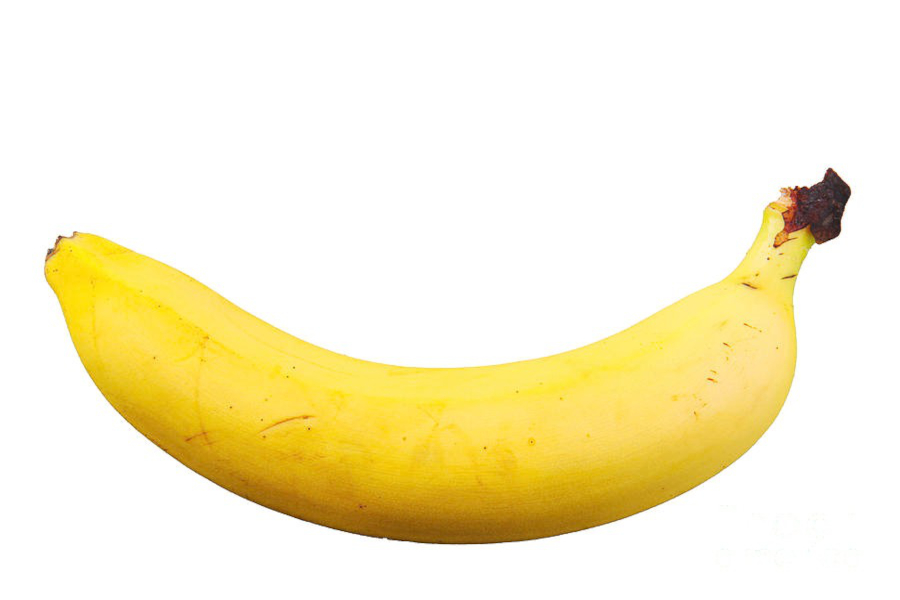

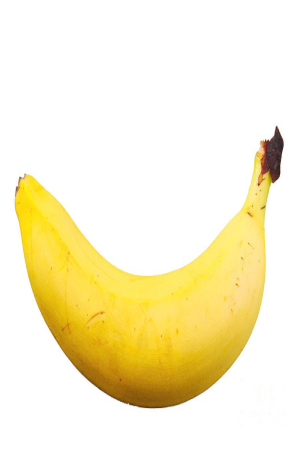

In [160]:
cv2_imshow(img_ori)
print("")
cv2_imshow(img_new)

#Nomor 2
####Tampilkan histogram citra bird.jpg untuk masing-masing komponen warna dalam satu grafik.

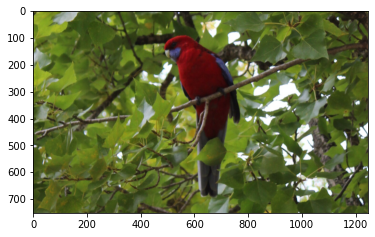

In [161]:
image = skimage.io.imread('bird.jpg')

fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

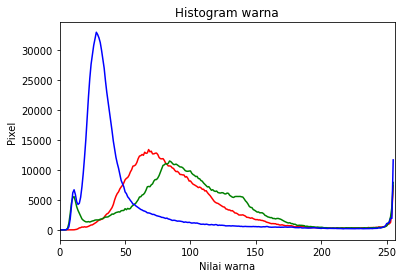

In [162]:
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Histogram warna")
plt.xlabel("Nilai warna")
plt.ylabel("Pixel")

plt.show()

#Nomor 3
####Gunakan perataan histogram untuk masing-masing komponen warna untuk memperbaiki kualitas citra kabut.png. Tampilkan histogramnya sebelum dan sesudah perataan untuk masing-masing komponen warna.

In [163]:
imgkabut = cv.imread('kabut.png', 0)

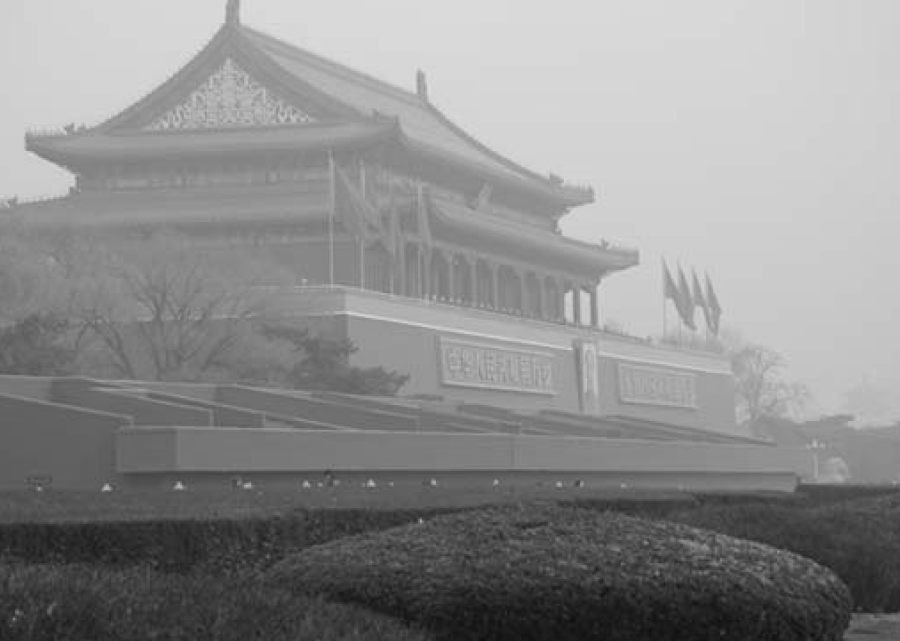

In [164]:
cv2_imshow(imgkabut)

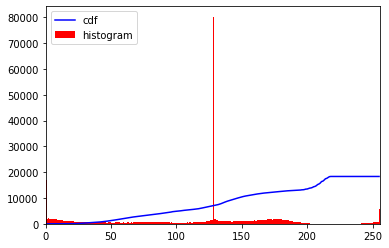

In [165]:
hist,bins = np.histogram(imgkabut.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [166]:
equ = cv.equalizeHist(imgkabut)

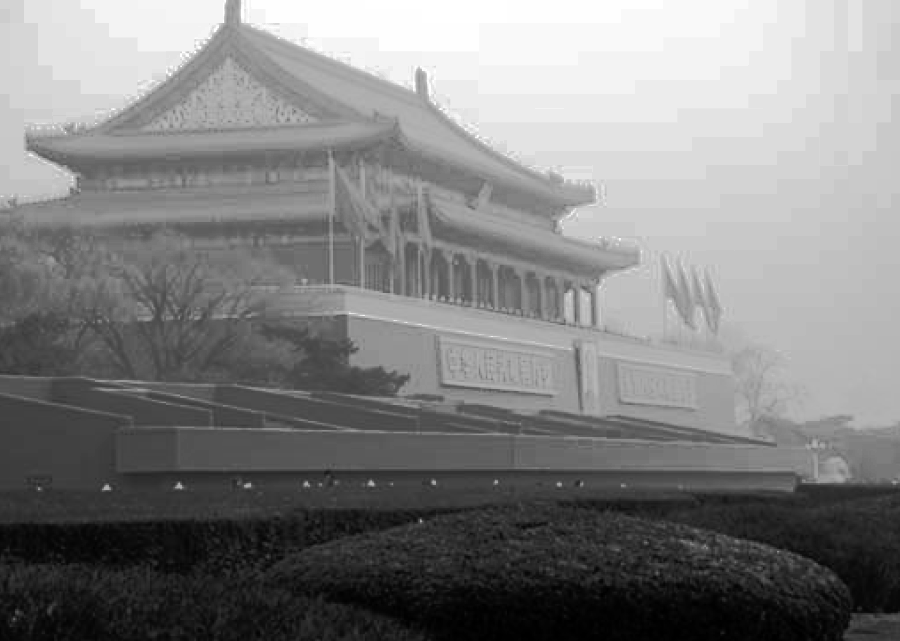

In [167]:
cv2_imshow(equ)


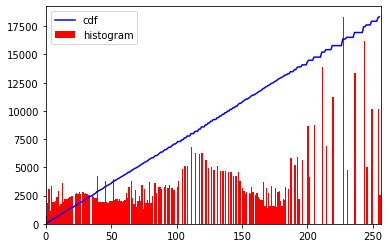

In [168]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#Nomor 4
####Proses gambar banana.jpg menggunakan highpass filter

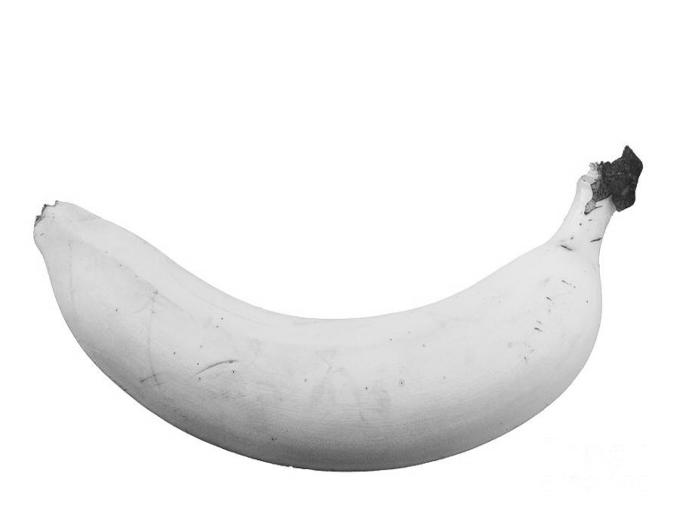

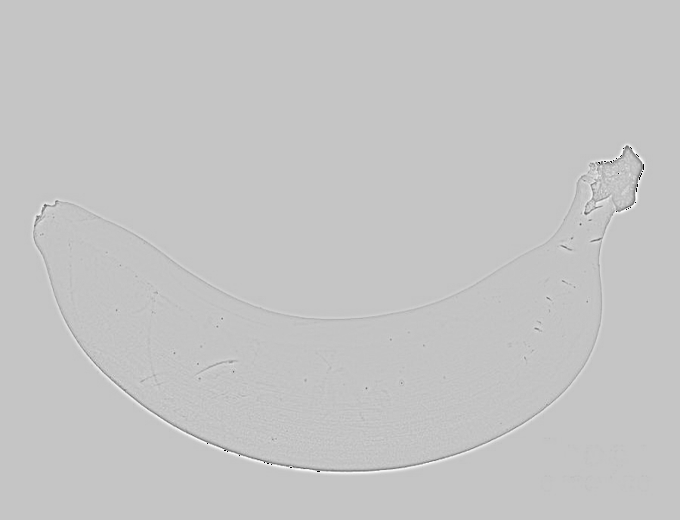

In [169]:
import cv2
 
img = cv2.imread("banana.jpg", 0)
img = cv2.resize(img, (680, 520),
                 interpolation=cv2.INTER_CUBIC)

hpf = img - cv2.GaussianBlur(img, (31, 31), 2)+197

cv2_imshow(img)
cv2_imshow(hpf)
 

#Nomor 5
#### Hilangkan noise pada citra phone_noise.jpg menggunakan average dan median filter

#####Median Filter

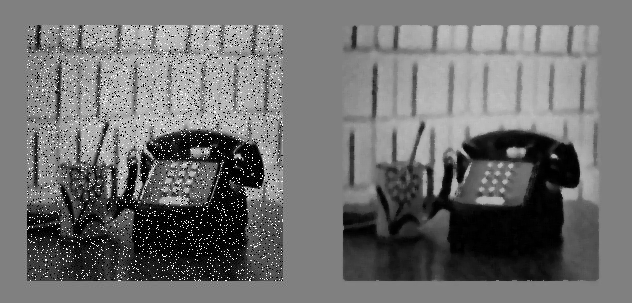

<function destroyAllWindows>

In [170]:
img = cv2.imread('phone_noise.jpg')
median = cv2.medianBlur(img, 5)
compare = np.concatenate((img, median), axis=1) #side by side comparison

cv2_imshow(compare)
cv2.waitKey(0)
cv2.destroyAllWindows

######Average Filter

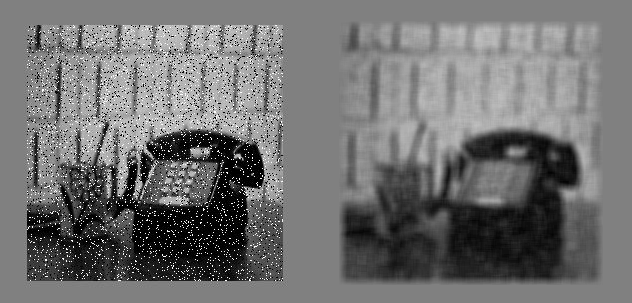

In [171]:
img = cv2.imread('phone_noise.jpg')

im1 = cv2.blur(img,(1,1))
im2 = cv2.boxFilter(img, -1, (9, 9), normalize=True)  

cv2_imshow(np.hstack((im1, im2)))